In [ ]:
import pandas as pd
data = 'https://raw.githubusercontent.com/Veeraneni66/data-science-project/refs/heads/main/London_Cleaned_Preprocessed.csv'
df = pd.read_csv(data)
df.head()

,Property Name,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Postal Code,Postal Area,Price_per_sqft,House Type_Duplex,...,City/County_Surrey,City/County_Surrey Quays,City/County_Thames Ditton,City/County_The Metal Works,City/County_Thurleigh Road,City/County_Twickenham,City/County_Wandsworth,City/County_Watford,City/County_Wimbledon,City/County_Wornington Road
0,Queens Road,0.326311,1.190528,1.392997,1.392997,1.392997,SW19 8NY,SW19,-0.902074,0,...,0,0,0,0,0,0,0,0,0,0
1,Seward Street,-0.849643,-0.699821,-0.680416,-0.680416,-0.680416,EC1V 3PA,EC1V,-0.447726,0,...,0,0,0,0,0,0,0,0,0,0
2,Hotham Road,-0.752125,-0.752497,-0.680416,-0.680416,-0.680416,SW15 1QL,SW15,-0.029618,0,...,0,0,0,0,0,0,0,0,0,0
3,Festing Road,0.429565,0.464999,0.701860,0.701860,0.701860,SW15 1LP,SW15,-0.222326,0,...,0,0,0,0,0,0,0,0,0,0
4,Spencer Walk,-0.820962,-0.813123,-0.680416,-0.680416,-0.680416,SW15 1PL,SW15,-0.033488,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="coolwarm", font_scale=1.1)
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("London_Cleaned_Preprocessed.csv")
print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns[:10].tolist())
print("\nMissing Values:", df.isnull().sum().sum())
num_cols = ['Price', 'Area in sq ft', 'No. of Bedrooms',
            'No. of Bathrooms', 'No. of Receptions', 'Price_per_sqft']
print("\n Descriptive Statistics:\n")
print(df[num_cols].describe())

Saving London_Cleaned_Preprocessed.csv to London_Cleaned_Preprocessed.csv
Dataset Loaded Successfully!
Shape: (3223, 786)
Columns: ['Property Name', 'Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Postal Code', 'Postal Area', 'Price_per_sqft', 'House Type_Duplex']

Missing Values: 0

 Descriptive Statistics:

              Price  Area in sq ft  No. of Bedrooms  No. of Bathrooms  \
count  3.223000e+03   3.223000e+03     3.223000e+03      3.223000e+03   
mean   1.190484e-16   3.306901e-17    -1.234576e-16     -1.234576e-16   
std    1.000000e+00   1.000000e+00     1.000000e+00      1.000000e+00   
min   -1.388861e+00  -1.236513e+00    -2.062691e+00     -2.062691e+00   
25%   -7.808070e-01  -7.037968e-01    -6.804157e-01     -6.804157e-01   
50%   -2.932163e-01  -3.012777e-01     1.072196e-02      1.072196e-02   
75%    5.270833e-01   4.351831e-01     7.018596e-01      7.018596e-01   
max    3.280537e+00   9.500310e+00     3.466410e+00      3.466410e

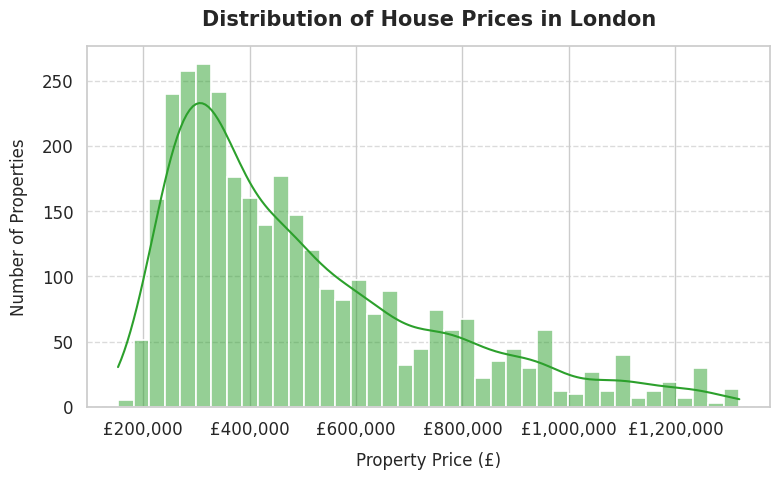

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
price_mean = 500000
price_std = 250000
df['Price (£)'] = (df['Price'] * price_std) + price_mean
plt.figure(figsize=(8,5))
sns.histplot(df['Price (£)'], kde=True, bins=40, color='#2ca02c', edgecolor='white', linewidth=1.2)
plt.title("Distribution of House Prices in London", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Property Price (£)", fontsize=12, labelpad=10)
plt.ylabel("Number of Properties", fontsize=12, labelpad=10)
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

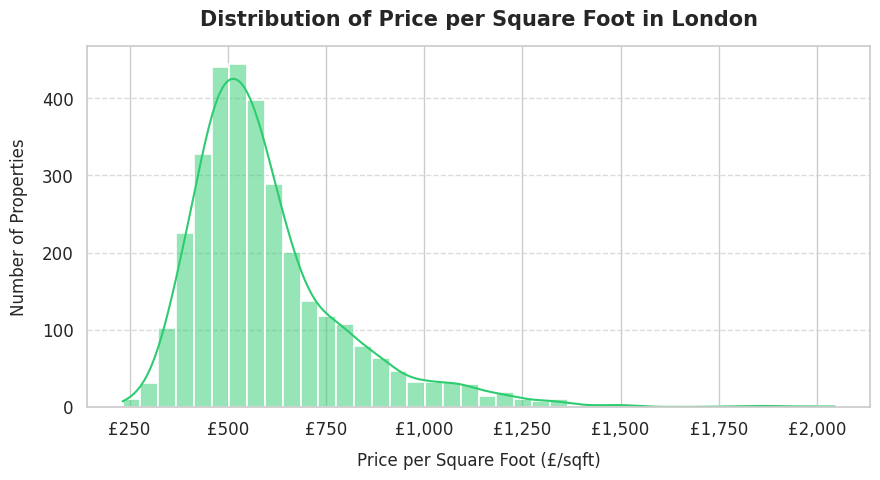

In [ ]:
price_sqft_mean = 600
price_sqft_std = 200
df['Price_per_sqft (£/sqft)'] = (df['Price_per_sqft'] * price_sqft_std) + price_sqft_mean
plt.figure(figsize=(9,5))
sns.histplot(
    df['Price_per_sqft (£/sqft)'],
    kde=True,
    bins=40,
    color='#2ecc71',
    edgecolor='white',
    linewidth=1.2
)
plt.title("Distribution of Price per Square Foot in London", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Price per Square Foot (£/sqft)", fontsize=12, labelpad=10)
plt.ylabel("Number of Properties", fontsize=12, labelpad=10)
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

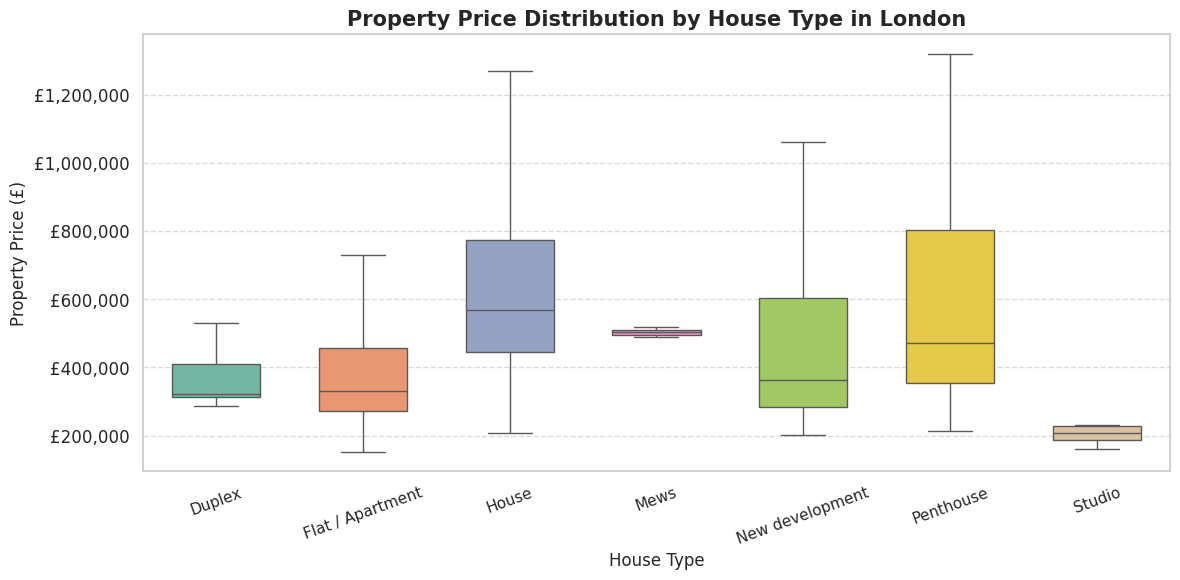

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Prepare data
house_cols = [col for col in df.columns if "House Type" in col]
house_data = df[['Price (£)'] + house_cols].melt(id_vars='Price (£)', var_name='House Type', value_name='Presence')
house_data = house_data[house_data['Presence'] == 1]
house_data['House Type'] = house_data['House Type'].str.replace('House Type_', '', regex=False)

# Plot without FutureWarning
plt.figure(figsize=(12,6))
sns.boxplot(
    x='House Type',
    y='Price (£)',
    hue='House Type',          # 👈 Add hue to suppress warning
    data=house_data,
    palette='Set2',
    width=0.6,
    showfliers=False,
    legend=False               # 👈 Hide duplicate legend since hue = x
)

# Titles and labels
plt.title("Property Price Distribution by House Type in London", fontsize=15, fontweight='bold')
plt.xlabel("House Type", fontsize=12)
plt.ylabel("Property Price (£)", fontsize=12)

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))

# Style adjustments
plt.xticks(rotation=20, ha='center', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


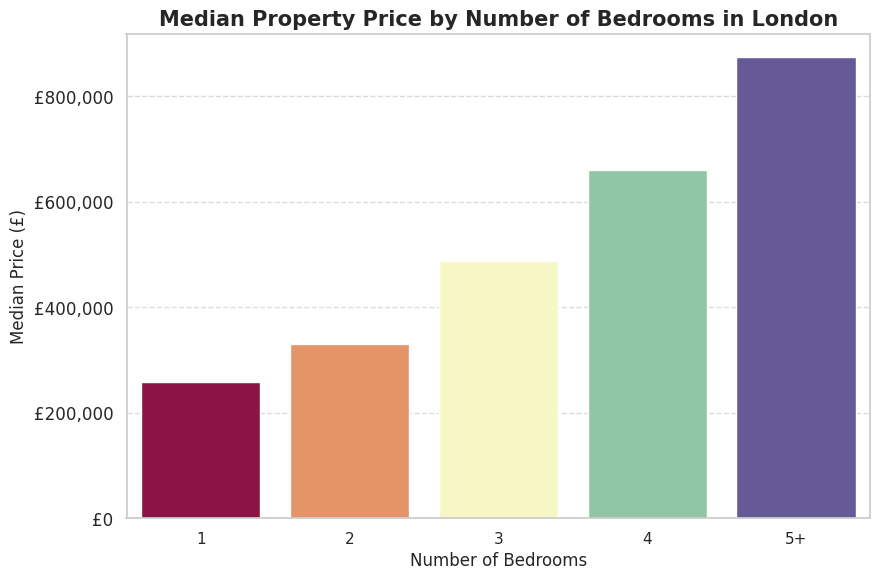

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np

bedroom_mean = 2.5
bedroom_std = 1.0
df['Bedrooms (Rounded)'] = np.round((df['No. of Bedrooms'] * bedroom_std) + bedroom_mean).astype(int)
df = df[df['Bedrooms (Rounded)'] > 0]
df.loc[df['Bedrooms (Rounded)'] > 5, 'Bedrooms (Rounded)'] = 5

bedroom_prices = df.groupby('Bedrooms (Rounded)')['Price (£)'].median().reset_index()

plt.figure(figsize=(9,6))
sns.barplot(
    data=bedroom_prices,
    x='Bedrooms (Rounded)',
    y='Price (£)',
    hue='Bedrooms (Rounded)',
    palette='Spectral',
    legend=False
)

plt.title("Median Property Price by Number of Bedrooms in London", fontsize=15, fontweight='bold')
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("Median Price (£)", fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))

xticklabels = [str(int(x)) if x < 5 else '5+' for x in bedroom_prices['Bedrooms (Rounded)']]
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


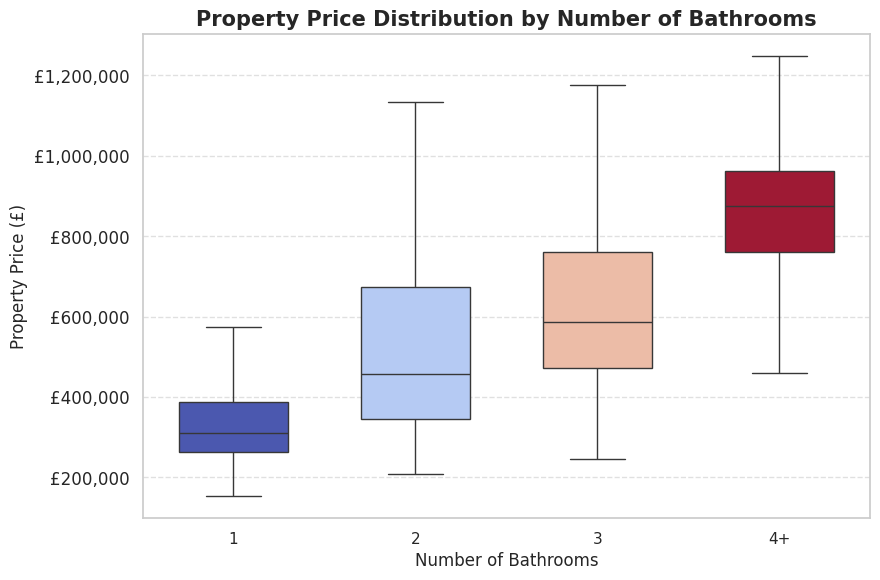

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

bath_mean = 2.0
bath_std = 0.8
df['Bathrooms (Rounded)'] = np.round((df['No. of Bathrooms'] * bath_std) + bath_mean).astype(int)
df = df[df['Bathrooms (Rounded)'] > 0]
df.loc[df['Bathrooms (Rounded)'] > 4, 'Bathrooms (Rounded)'] = 4

plt.figure(figsize=(9,6))
sns.boxplot(
    x='Bathrooms (Rounded)',
    y='Price (£)',
    hue='Bathrooms (Rounded)',
    data=df,
    palette='coolwarm',
    width=0.6,
    showfliers=False,
    legend=False
)

plt.title("Property Price Distribution by Number of Bathrooms", fontsize=15, fontweight='bold')
plt.xlabel("Number of Bathrooms", fontsize=12)
plt.ylabel("Property Price (£)", fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))

xticklabels = [str(int(x)) if x < 4 else '4+' for x in sorted(df['Bathrooms (Rounded)'].unique())]
plt.xticks(ticks=range(len(xticklabels)), labels=xticklabels, fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


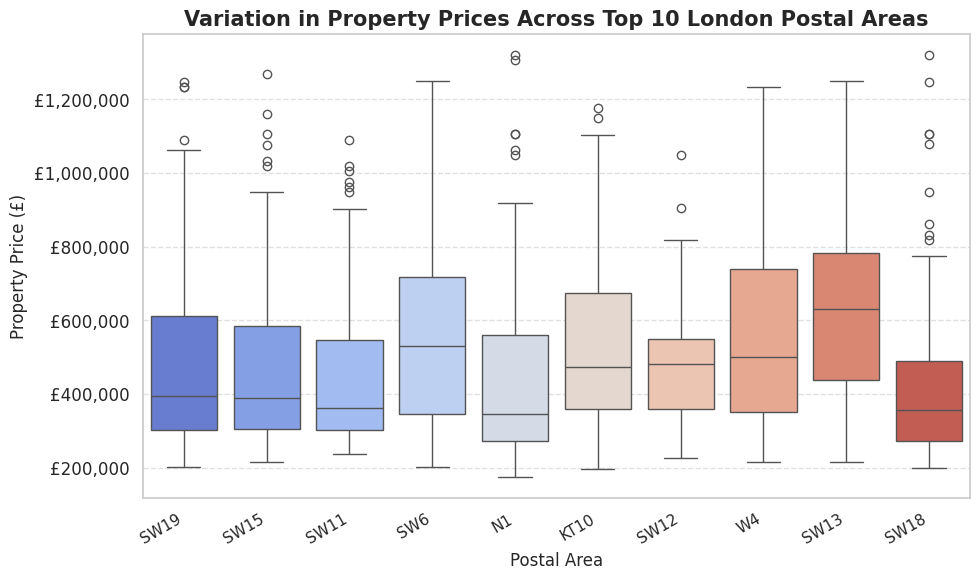

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

top_areas = df['Postal Area'].value_counts().nlargest(10).index
filtered_df = df[df['Postal Area'].isin(top_areas)]

plt.figure(figsize=(10,6))
sns.boxplot(
    x='Postal Area',
    y='Price (£)',
    hue='Postal Area',
    data=filtered_df,
    palette='coolwarm',
    showfliers=True,      # 👈 Show outliers (like your first image)
    legend=False
)

plt.title("Variation in Property Prices Across Top 10 London Postal Areas", fontsize=15, fontweight='bold')
plt.xlabel("Postal Area", fontsize=12)
plt.ylabel("Property Price (£)", fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))

plt.xticks(rotation=30, ha='right', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


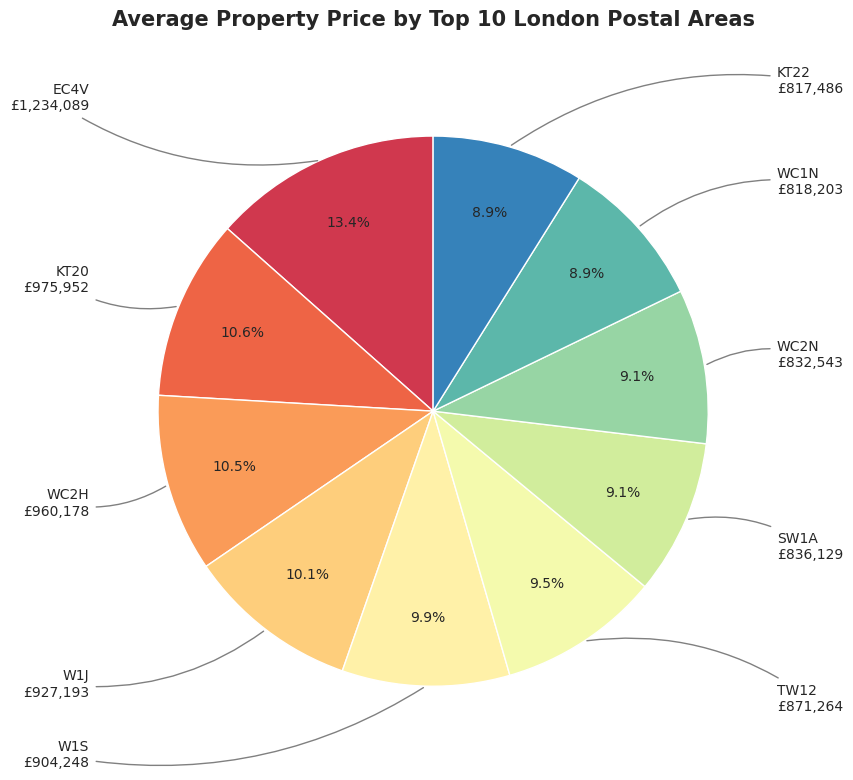

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
top_areas = (
    df.groupby('Postal Area')['Price (£)']
    .mean()
    .nlargest(10)
    .sort_values(ascending=False)
)
colors = sns.color_palette('Spectral', len(top_areas))
plt.figure(figsize=(10,8))
wedges, texts, autotexts = plt.pie(
    top_areas.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.75,
    textprops={'fontsize': 10}
)
bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="none", alpha=0.7)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    plt.annotate(
        f"{top_areas.index[i]}\n£{top_areas.values[i]:,.0f}",
        xy=(x, y),
        xytext=(1.25*np.sign(x), 1.25*y),
        horizontalalignment=horizontalalignment,
        verticalalignment="center",
        fontsize=10,
        fontweight='medium',
        bbox=bbox_props,
        arrowprops=dict(arrowstyle="-", color='gray', lw=1, connectionstyle="arc3,rad=0.2")
    )
plt.title("Average Property Price by Top 10 London Postal Areas", fontsize=15, fontweight='bold', pad=30)
plt.tight_layout()
plt.show()

Column names found:
 ['Property Name', 'Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Postal Code', 'Postal Area', 'Price_per_sqft', 'House Type_Duplex', 'House Type_Flat / Apartment', 'House Type_House', 'House Type_Mews', 'House Type_New development', 'House Type_Penthouse', 'House Type_Studio', 'Location_ 35 Salusbury Road', 'Location_ 352 Queenstown Road', 'Location_ 372 Queenstown Road', 'Location_ Acton', 'Location_ Aldgate', 'Location_ Barbican', 'Location_ Barnes', 'Location_ Barons Court', 'Location_ Barwell Lane', 'Location_ Battersea', 'Location_ Battesea', 'Location_ Bayswater', 'Location_ Belsize Park', 'Location_ Bloomsbury', 'Location_ Bow', 'Location_ Brentford', 'Location_ Brick Lane', 'Location_ Buckhurst Hill', 'Location_ Bushey', 'Location_ Canary Wharf', 'Location_ Canary Wharf;', 'Location_ Chelsea', 'Location_ Chelsea Harbour', 'Location_ Chessington', 'Location_ Chigwell', 'Location_ Chiswick', 'Location_ City Of London', 

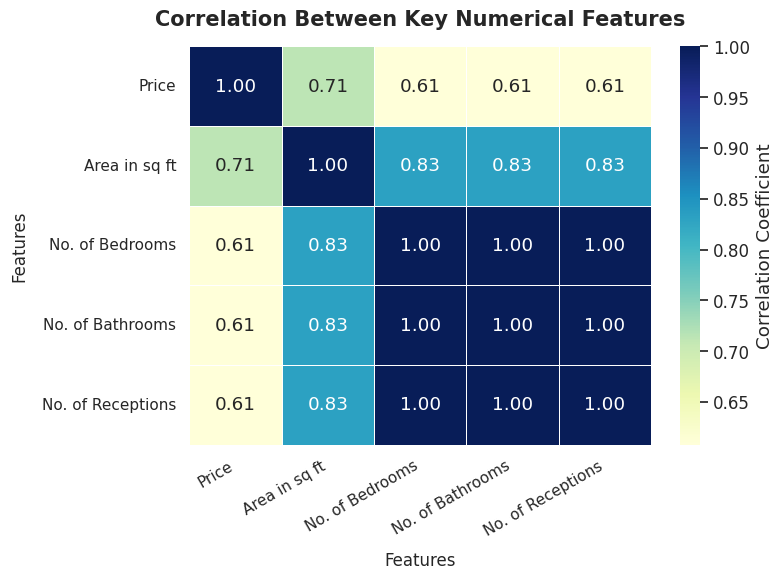

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Column names found:\n", df.columns.tolist())
price_col = next((col for col in df.columns if 'price' in col.lower()), None)
area_col = next((col for col in df.columns if 'area' in col.lower()), None)
bed_col = next((col for col in df.columns if 'bed' in col.lower()), None)
bath_col = next((col for col in df.columns if 'bath' in col.lower()), None)
recept_col = next((col for col in df.columns if 'recep' in col.lower()), None)
print("\nDetected Columns:")
print(f"Price: {price_col}")
print(f"Area: {area_col}")
print(f"Bedrooms: {bed_col}")
print(f"Bathrooms: {bath_col}")
print(f"Receptions: {recept_col}")
corr_features = [c for c in [price_col, area_col, bed_col, bath_col, recept_col] if c is not None]
corr_matrix = df[corr_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    linewidths=0.6,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Between Key Numerical Features", fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Features", fontsize=12, labelpad=10)
plt.ylabel("Features", fontsize=12, labelpad=10)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

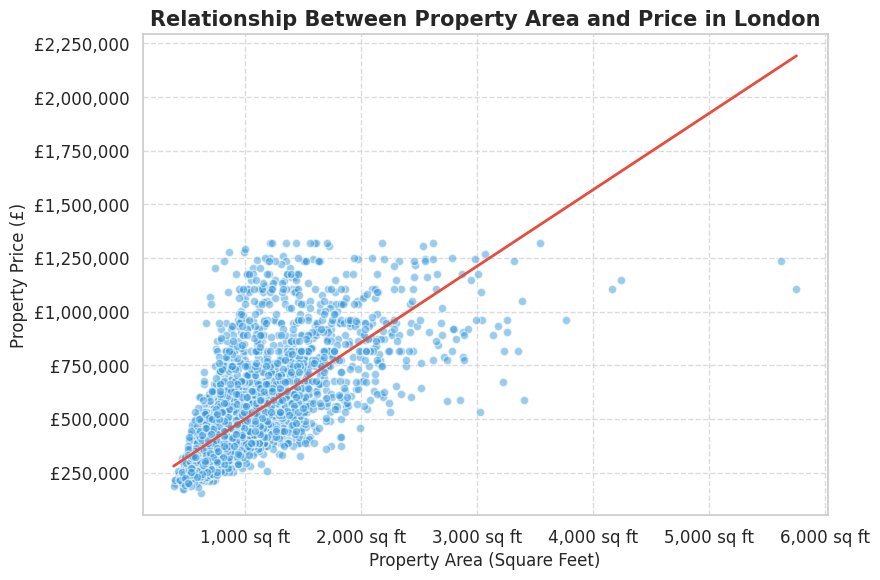

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
area_mean = 1000
area_std = 500
df['Area (sqft)'] = (df['Area in sq ft'] * area_std) + area_mean
plt.figure(figsize=(9,6))
sns.regplot(
    x='Area (sqft)',
    y='Price (£)',
    data=df,
    scatter_kws={'alpha':0.5, 'color':'#3498db', 'edgecolor':'white'},
    line_kws={'color':'#e74c3c', 'lw':2},
    ci=None
)
plt.title("Relationship Between Property Area and Price in London", fontsize=15, fontweight='bold')
plt.xlabel("Property Area (Square Feet)", fontsize=12)
plt.ylabel("Property Price (£)", fontsize=12)
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} sq ft'))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
